# RNN_Prediction of DAX movements
In this notebook, I try to make a (quite simple) prediction for Dax movements using Recurrent Neural Networks (RNN). This notebook is extremly inspired by the Udemy Course "Deep Learning, Neuronale Netze & AI: Der Komplettkurs" by Jannis Seemann. The DAX prices are provided from Thomson Reuters (University License). Starting from the template of the Udemy Course, I had to make several adjustements and additional calcuations, o make the predictions better, flexibel, especially the DAX data usable and the predictions to be real predictions (as say today how the Dax will move tomorrow).

In [1]:
daysToForecast = 2 # How many days to look ahead?
daysToTakeIntoAccountForForecast = 50 # How many (historic) days to take into account for calculating forecast?

You shouldn't change anything except the values above this line. 

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("../data/DAX_DATA/Price_History_daily_50y.csv")
df = df[::-1]

shift = daysToForecast
days = daysToTakeIntoAccountForForecast

df["Close_after"] = df["DAX 30 PERFORMANCE - PRICE INDEX"].shift(shift)
df["Close_changes"] = (df["Close_after"] / df["DAX 30 PERFORMANCE - PRICE INDEX"]) - 1
df["Close_changes"] = df["Close_changes"].shift(-1)

df = df.dropna()

changes = df["Close_changes"]

X = []
Y = []

for i in range(shift, len(changes) - days):
    Y.append(changes[i])
    X.append(np.array(changes[i+1:i+1+days][::-1]))
    
X = np.array(X).reshape(-1, days, 1)
Y = np.array(Y)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(100, input_shape=(50, 1)))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="mse")
model.fit(X, Y, batch_size=32, epochs=15)

Epoch 1/15
406/406 [==============================] - 12s 31ms/step - loss: 0.0028
Epoch 2/15
406/406 [==============================] - 13s 31ms/step - loss: 3.0745e-04
Epoch 3/15
406/406 [==============================] - 14s 35ms/step - loss: 3.0745e-04
Epoch 4/15
406/406 [==============================] - 14s 35ms/step - loss: 3.0741e-04
Epoch 5/15
406/406 [==============================] - 15s 38ms/step - loss: 3.0746e-04
Epoch 6/15
406/406 [==============================] - 13s 32ms/step - loss: 3.0743e-04
Epoch 7/15
406/406 [==============================] - 13s 32ms/step - loss: 3.0738e-04
Epoch 8/15
406/406 [==============================] - 13s 33ms/step - loss: 3.0743e-04
Epoch 9/15
406/406 [==============================] - 14s 34ms/step - loss: 3.0742e-04
Epoch 10/15
406/406 [==============================] - 13s 32ms/step - loss: 3.0744e-04
Epoch 11/15
406/406 [==============================] - 13s 32ms/step - loss: 3.0742e-04
Epoch 12/15
406/406 [========================

In [4]:
predictions = model.predict(X)
predictions = predictions.reshape(-1)
predictions = np.append(predictions, np.zeros(days))
predictions = np.append(np.zeros(shift), predictions)

df["predictions"] = predictions
df["Close_predicted"] = df["Close_after"] * (1 + df["predictions"])

You shouldn't change anything except the the values (x1 and x2) below this line. The represent the range which shall be plotted in the next step.

In [5]:
x1 = 0 # change these two values to change the plotted range
x2 = 80 # x1 has to be less / before x2

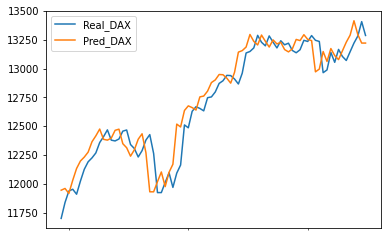

In [6]:
# https://matplotlib.org/gallery/text_labels_and_annotations/date.html

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# format the ticks
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

dates = np.array(df.index).astype(np.datetime64)

plt.plot(df.index[x1:x2], df["Close_predicted"][x1:x2], label="Pred_DAX")
plt.plot(df.index[x1:x2], df["DAX 30 PERFORMANCE - PRICE INDEX"][x1:x2], label="Real_DAX")
plt.legend()

plt.show()

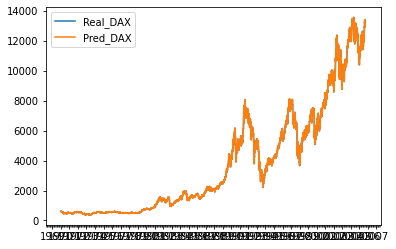

In [7]:
# https://matplotlib.org/gallery/text_labels_and_annotations/date.html

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# format the ticks
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

dates = np.array(df.index).astype(np.datetime64)

plt.plot(df.index, df["DAX 30 PERFORMANCE - PRICE INDEX"], label="Real_DAX")
plt.plot(df.index, df["Close_predicted"], label="Pred_DAX")

plt.legend()

plt.show()